# WebScraping of Amazon.de to Get Information on Best Selling Books

# Introduction
This is a group work with 3 people from integrify.io; Saber, Marufa and Mamun. We have decided to work together on webscraping to make a project on book list from amazon website. We have searched best selling books from Amazon.de site and found 2 pages of 100 books. From those we will find out the list consists of:
- Rank
- Picture
- Book Tittle
- Ratings
- Store Name
- Price
- number of reviewers

# Objective:
- To find out useful information from website
- Make a list of useful information to make a dataframe
- Analysis that dataframe with visualization in a simple way for audience understandable.

# Import libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import seaborn as sns
cf.go_offline()
from plotly.offline import iplot
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML

/home/saber/anaconda3/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



# Load data from website defining a function with page number 

In [2]:
def get_data(page_no):
    #will fecth the data from the website and get data content using BeautifullSoup Library
    url = "https://www.amazon.de/gp/bestsellers/books/ref=zg_bs_pg_"+str(page_no)+"?ie=UTF8&pg="+str(page_no)
    print(f"{url} --> Done")
    header = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3914.0 Safari/537.36'}
    source = requests.get(url,header)
    soup = BeautifulSoup(source.text,'html.parser')
    return soup

def df_maker(soup):
    #creating the dataframe
    rank = []
    picture = []
    name = []
    ratings = []
    store_name = []
    price = []
    number_of_reviewers = []

    for i in soup.select(".zg-item-immersion"):
        rank.append(i.find("span").select(".zg-badge-text")[0].text)
        picture.append(i.find('img')['src'])
        name.append(i.find('div').select(".p13n-sc-truncate")[0].text.replace('\n','').strip())
        try:
            ratings.append(i.find('i').text.replace('von','of').replace('Sternen','Star').replace(',','.'))
            number_of_reviewers.append(i.select('.a-size-small.a-link-normal')[0].text)
        except:
            ratings.append('None')
            number_of_reviewers.append(0)
        store_name.append(i.find('span').select('.a-color-secondary')[0].text)
        price.append(i.find('span').select('.a-color-price')[0].text.replace('\xa0€','').replace(',','.'))
        
    data = {
    'Rank':rank,
    'Picture':picture,
    'Book Title':name,
    'Ratings':ratings,
    'Store Name':store_name,
    'Price':price,
    'Number of Reviewers': number_of_reviewers
    }
    return pd.DataFrame(data)

In [15]:
page_1_soup = get_data(1)
page_2_soup = get_data(2)

https://www.amazon.de/gp/bestsellers/books/ref=zg_bs_pg_1?ie=UTF8&pg=1 --> Done
https://www.amazon.de/gp/bestsellers/books/ref=zg_bs_pg_2?ie=UTF8&pg=2 --> Done


In [16]:
# creating the final dataframe
page_1_df = df_maker(page_1_soup)
page_2_df = df_maker(page_2_soup)
df = pd.concat([page_1_df,page_2_df])
df = df.reset_index()
df.drop(columns='index',inplace=True)
df['Numeric Ratings'] = [0 if (i =='None') else float(i[:3])for i in df['Ratings']]
df['Price'] = df['Price'].astype(float)
df['Number of Reviewers'] = df['Number of Reviewers'].astype(float)
df['Picture'] = ['<img src="'+ str(x) + '" width="50" >' for x in df['Picture']]

In [17]:
HTML(df.to_html(escape=False))

,Rank,Picture,Book Title,Ratings,Store Name,Price,Number of Reviewers,Numeric Ratings
0,#1,,"Pfoten vom Tisch!: Meine Katzen, andere Katzen und ich",None,Gebundene Ausgabe,22.00,0.000,0.0
1,#2,,"Geh schon mal in dich, das Glück kommt dann nach: Wie du deine innere Schönheit entdeckst und dabei nach außen strahlen kannst - Selbstzweifel für immer loswerden",None,Taschenbuch,9.99,0.000,0.0
2,#3,,"Ein Eimer Farbe für dein Leben: 24/7 mit twenty4tim - DIYs, Challenges, Storytimes & Co.",4.7 of 5 Star,Taschenbuch,15.00,101.000,4.7
3,#4,,"Bretonische Idylle: Kommissar Dupins zehnter Fall (Kommissar Dupin ermittelt, Band 10)",4.4 of 5 Star,Broschiert,16.00,393.000,4.4
4,#5,,Falsche Pandemien: Argumente gegen die Herrschaft der Angst,4.6 of 5 Star,Broschiert,20.00,151.000,4.6
5,#6,,Das Café am Rande der Welt: eine Erzählung über den Sinn des Lebens,4.5 of 5 Star,Taschenbuch,8.95,12.032,4.5
6,#7,,Das Kind in dir muss Heimat finden: Der Schlüssel zur Lösung (fast) aller Probleme,4.7 of 5 Star,Broschiert,14.99,8.595,4.7
7,#8,,"Die verschwundene Schwester: Roman (Die sieben Schwestern, Band 7)",4.4 of 5 Star,Gebundene Ausgabe,22.00,3.633,4.4
8,#9,,Die Selbstgerechten: Mein Gegenprogramm - für Gemeinsinn und Zusammenhalt,4.7 of 5 Star,Gebundene Ausgabe,24.95,727.000,4.7
9,#10,,"Energy!: Der gesunde Weg aus dem Müdigkeitslabyrinth, Mit 30-Tage-Selbsthilfeprogramm",4.6 of 5 Star,Gebundene Ausgabe,25.00,493.000,4.6


In [18]:
df.head()

,Rank,Picture,Book Title,Ratings,Store Name,Price,Number of Reviewers,Numeric Ratings
0,#1,"<img src=""https://images-eu.ssl-images-amazon....","Pfoten vom Tisch!: Meine Katzen, andere Katzen...",None,Gebundene Ausgabe,22.00,0.0,0.0
1,#2,"<img src=""https://images-eu.ssl-images-amazon....","Geh schon mal in dich, das Glück kommt dann na...",None,Taschenbuch,9.99,0.0,0.0
2,#3,"<img src=""https://images-eu.ssl-images-amazon....",Ein Eimer Farbe für dein Leben: 24/7 mit twent...,4.7 of 5 Star,Taschenbuch,15.00,101.0,4.7
3,#4,"<img src=""https://images-eu.ssl-images-amazon....",Bretonische Idylle: Kommissar Dupins zehnter F...,4.4 of 5 Star,Broschiert,16.00,393.0,4.4
4,#5,"<img src=""https://images-eu.ssl-images-amazon....",Falsche Pandemien: Argumente gegen die Herrsch...,4.6 of 5 Star,Broschiert,20.00,151.0,4.6


# Data Analysis

In [29]:
# Statistical Overview
df.describe()

,Price,Number of Reviewers,Numeric Ratings
count,100.00000,100.000000,100.000000
mean,12.96920,111.218420,4.404000
std,6.30532,202.018568,1.030242
min,3.99000,0.000000,0.000000
25%,8.71000,2.132000,4.500000
50%,11.99500,5.032500,4.700000
75%,15.99250,126.000000,4.800000
max,34.95000,922.000000,4.900000


## explanation
Out of 100 sample data we have found min price of the book is 3.99 euro and maximum price 34.95 where average price is 12.94.
And in case of rating maximum rating is 5 and we have found average rating is 4.5

## Correlation between different variables

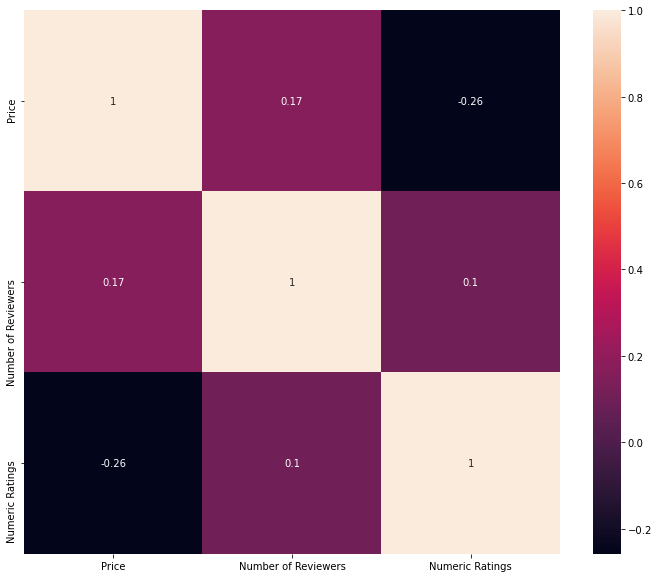

In [30]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True);

There is a positive relation exists between number of Reviewers and Ratings.

## Top 10 Ratings Based on Number of Reviewers

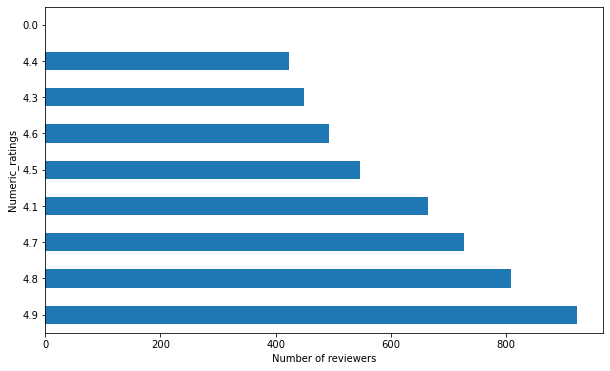

In [31]:
plt.figure(figsize = (10,6))
df.groupby("Numeric Ratings")["Number of Reviewers"].max().sort_values(ascending = False).plot(kind = "barh", );
plt.ylabel("Numeric_ratings")
plt.xlabel("Number of reviewers")
plt.show();

We can see that 4.7 to 4.9 contains the majority of reviews from reviewers.

## Top 10 Books Based on Number of Reviewers

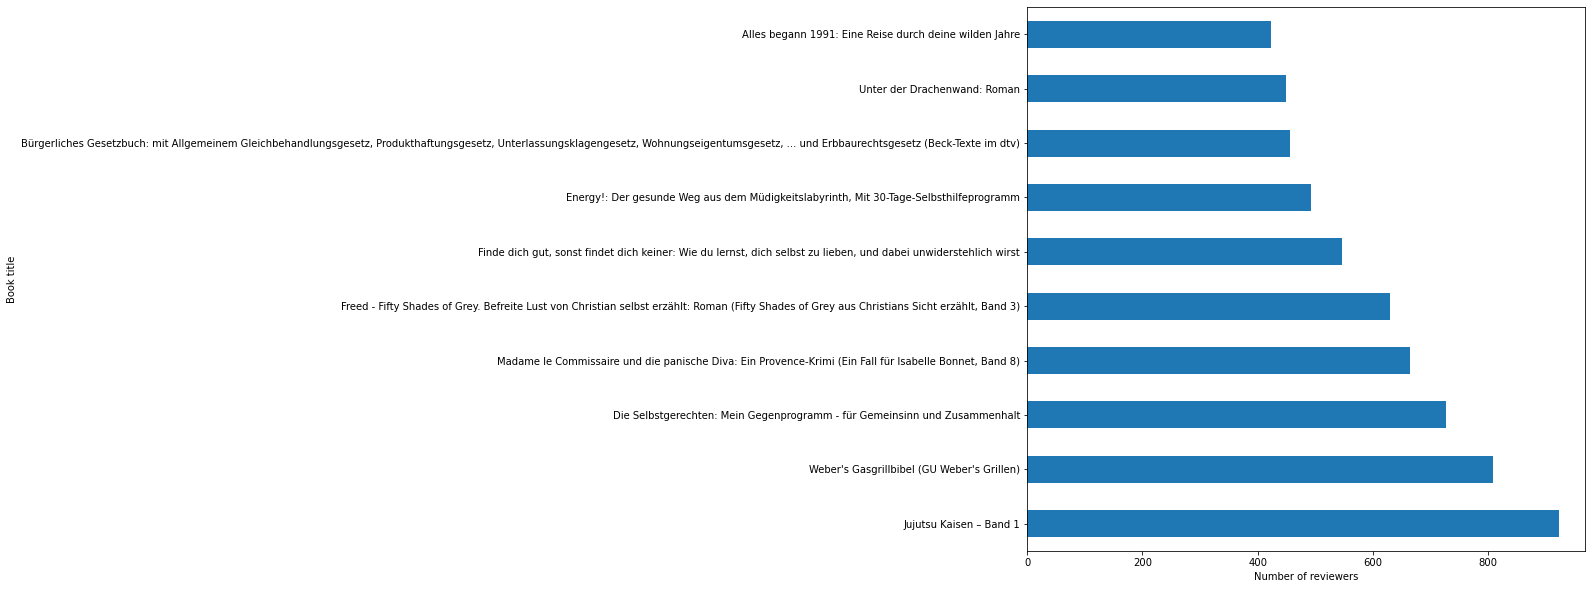

In [32]:
plt.figure(figsize = (10,10))
df.groupby("Book Title")["Number of Reviewers"].max().nlargest(10).sort_values(ascending = False).plot(kind = "barh", );
plt.ylabel("Book title")
plt.xlabel("Number of reviewers")
plt.show();

## Based on price sort the book list

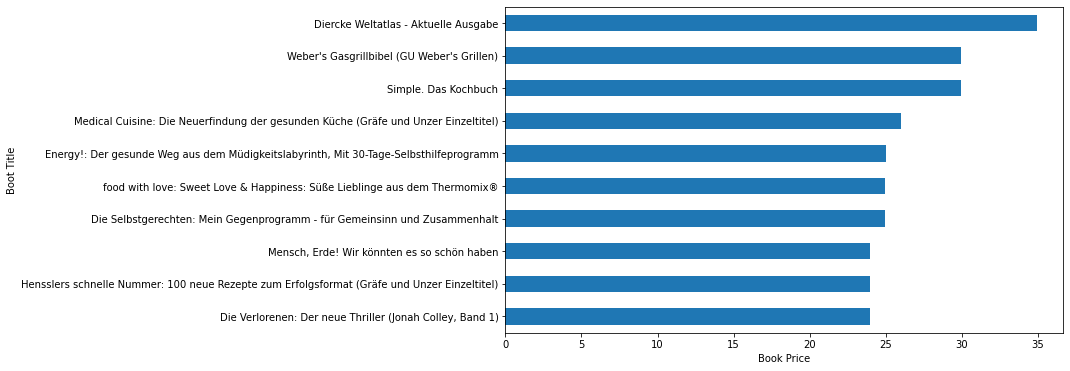

In [33]:
plt.figure(figsize = (10,6))
df.groupby("Book Title")["Price"].max().nlargest(10).sort_values(ascending = True).plot(kind = "barh");
plt.xlabel("Book Price")
plt.ylabel("Boot Title")
plt.show();

In [34]:
df.groupby(by='Numeric Ratings')[['Book Title','Price']].max().sort_values(by= "Price", ascending = False)

,Book Title,Price
Numeric Ratings,,
4.8,tiptoi® Wir entdecken die Dinosaurier (tiptoi®...,34.95
4.3,Unter der Drachenwand: Roman,26.00
4.6,Woman on Fire: Alles über die fabelhaften Wech...,25.00
0.0,food with love: Sweet Love & Happiness: Süße L...,24.99
4.7,Vielleicht - Eine Geschichte über die unendlic...,24.95
4.5,Über Menschen: Roman,24.00
4.4,Tschick: roman,22.00
4.9,Jujutsu Kaisen – Band 1,12.00
4.1,Madame le Commissaire und die panische Diva: E...,10.99


We can see that __Wir entdecken die Dinosaurier__ has the highest price and contains 4.8 Ratings.

In [35]:
df.groupby(by='Numeric Ratings')[['Book Title','Price']].min()

,Book Title,Price
Numeric Ratings,,
0.0,Die Verlorenen: Der neue Thriller (Jonah Colle...,9.99
4.1,Honigherzen: Roman | Sommerlich humorvoller Li...,10.00
4.3,Der Donnerstagsmordclub: Kriminalroman | Der M...,12.90
4.4,365 Low-Carb-Rezepte: Low Carb Rezepte für ein...,6.00
4.5,"Achtsam morden: Roman (Achtsam morden-Reihe, B...",8.95
4.6,99 herrlich verrückte Ideen für euer Leben zu ...,5.90
4.7,1. Klasse Komplett - Das umfangreiche Übungshe...,3.99
4.8,Das NEINhorn,5.00
4.9,Chainsaw Man 01,6.95


## Top 20 Bestseller books in Amazon.de based on Ratings

In [36]:
a = df.groupby(by="Book Title")[["Numeric Ratings"]].max().sort_values("Numeric Ratings",ascending=False)[:20]
fig = px.bar(a,x="Numeric Ratings", color_discrete_sequence=px.colors.qualitative.Pastel1,opacity = 0.5, title= "Top 20 Bestseller books in Amazon.de based on ratings")
fig.show()

So we can see that __Dierche Weltatlas- Aktuele Ausgabe__ is the best book based on the ratings.

## Based on Ratings sums of the Percentages of Book prices

In [37]:
a = df.groupby(by="Numeric Ratings")[["Price"]].mean().reset_index()
fig= px.histogram(a, x="Numeric Ratings",y= "Price",opacity=0.5,nbins=10,
                  color="Numeric Ratings", title = "Based on Ratings sums of the Percentages of Book prices")
fig.show()

## Average Performance Distribution of Price, Number of Review and Ratings

In [65]:
a = df.groupby(by="Price").mean().reset_index()
fig =px.line(a, title = 'Average Performance Distribution of Price, Number of Review and Ratings')
fig.show()

## Analysis based on Book Store

In [66]:
book_store_analysis = df.groupby(by='Store Name')[['Number of Reviewers','Numeric Ratings']].max().sort_values('Number of Reviewers',ascending=False)
print(book_store_analysis)
book_store_analysis.iplot(kind='bar', title = 'Maximum Number of reviews and Ratings on Different Book Stores')

                   Number of Reviewers  Numeric Ratings
Store Name                                             
Taschenbuch                    922.000              4.9
Gebundene Ausgabe              808.000              4.9
Broschiert                     630.000              4.8
Spiralbindung                   22.000              4.8
Broschüre                        3.607              4.8
Geschenkartikel                  3.065              4.6
Sonstiges Zubehör                1.383              4.8
Karten                           1.299              4.6


In [63]:
sells_based_on_store = df.groupby(by="Store Name")[["Store Name"]].count()
print(sells_based_on_store)
fig = px.pie(sells_based_on_store, values='Store Name',names=sells_based_on_store.index,title='Percentages of Books selling in the store')
fig.show()

                   Store Name
Store Name                   
Broschiert                 12
Broschüre                   2
Gebundene Ausgabe          39
Geschenkartikel             1
Karten                      1
Sonstiges Zubehör           1
Spiralbindung               4
Taschenbuch                40


# Conclution:

We have fetched a Amazon bestselling Books Website to do a webscrapping and data analysis. Our main objective of this project to get most possible data and analyse it. We also try to visualize it in different ways to show various informations.